<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exploratory-Data-Analysis-(EDA)" data-toc-modified-id="Exploratory-Data-Analysis-(EDA)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Exploratory Data Analysis (EDA)<a id="3_Exploratory_Data_Analysis"></a></a></span><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Introduction<a id="3.1_Introduction"></a></a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Imports<a id="3.2_Imports"></a></a></span></li><li><span><a href="#Loading-the-Data" data-toc-modified-id="Loading-the-Data-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Loading the Data<a id="1.4_Loading_Data"></a></a></span><ul class="toc-item"><li><span><a href="#Running-Pandas-Profiling-Report" data-toc-modified-id="Running-Pandas-Profiling-Report-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Running Pandas Profiling Report<a id="3.3.1_Running_Pandas_Profiling"></a></a></span></li></ul></li></ul></li></ul></div>

# Exploratory Data Analysis (EDA)<a id='3_Exploratory_Data_Analysis'></a>

## Introduction<a id='3.1_Introduction'></a>

For any reference to previous steps of problem identification and data wrangling, please refer notebook at 
(%%html <a href="https://github.com/jayguptacal/EnergyProjects/blob/main/IndustrialHealthSafetyData/notebooks/Industrial_Health_Safety_DataWrangling%20.ipynb" target="_new">Industrial Health and Safety Problem Identification and Data Wrangling Notebook</a>).

The focus will be on the Exploratory Data Analysis for this notebook as shown below in the Data Science Method (DSM) process flow diagram:
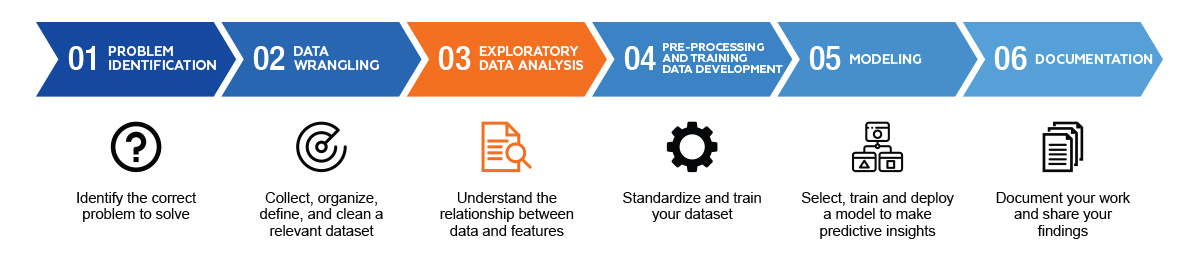

## Imports<a id='3.2_Imports'></a>

In [1]:
# Importing the required packages, libraries and utilities at one place to keep it clean

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style; style.use('fivethirtyeight')
import seaborn as sns
import os
%matplotlib inline
from library.sb_utils import save_file

from pandas_profiling import ProfileReport
from sklearn.impute import SimpleImputer

## Loading the Data<a id='1.4_Loading_Data'></a>

In [2]:
# Loading the csv data file here
data_cleaned = pd.read_csv('../data/data_cleaned.csv')
data_cleaned.head()

,Date,Country,Local,Industry,Accident_level,Pot_acc_level,Gender,Emp_type,Critical_risk,Description,Day,Month,Year,Weekday
0,2016-01-01,country_01,local_01,mining,1,4,male,third party,pressed,while removing the drill rod of the jumbo 08 f...,1,1,2016,<built-in method day_name of Timestamp object ...
1,2016-01-02,country_02,local_02,mining,1,4,male,employee,pressurized systems,during the activation of a sodium sulphide pum...,2,1,2016,<built-in method day_name of Timestamp object ...
2,2016-01-06,country_01,local_03,mining,1,3,male,third party (remote),manual tools,in the sub-station milpo located at level +170...,6,1,2016,<built-in method day_name of Timestamp object ...
3,2016-01-08,country_01,local_04,mining,1,1,male,third party,others,being 9:45 am. approximately in the nv. 1880 c...,8,1,2016,<built-in method day_name of Timestamp object ...
4,2016-01-10,country_01,local_04,mining,4,4,male,third party,others,approximately at 11:45 a.m. in circumstances t...,10,1,2016,<built-in method day_name of Timestamp object ...


In [3]:
# Checking the file here
data_cleaned.columns

Index(['Date', 'Country', 'Local', 'Industry', 'Accident_level',
       'Pot_acc_level', 'Gender', 'Emp_type', 'Critical_risk', 'Description',
       'Day', 'Month', 'Year', 'Weekday'],
      dtype='object')

In [4]:
# Fixing the weekday as it is not returning the right values
data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'])
data_cleaned['Weekday'] = data_cleaned['Date'].apply(lambda x: x.day_name())
data_cleaned.head()

,Date,Country,Local,Industry,Accident_level,Pot_acc_level,Gender,Emp_type,Critical_risk,Description,Day,Month,Year,Weekday
0,2016-01-01,country_01,local_01,mining,1,4,male,third party,pressed,while removing the drill rod of the jumbo 08 f...,1,1,2016,Friday
1,2016-01-02,country_02,local_02,mining,1,4,male,employee,pressurized systems,during the activation of a sodium sulphide pum...,2,1,2016,Saturday
2,2016-01-06,country_01,local_03,mining,1,3,male,third party (remote),manual tools,in the sub-station milpo located at level +170...,6,1,2016,Wednesday
3,2016-01-08,country_01,local_04,mining,1,1,male,third party,others,being 9:45 am. approximately in the nv. 1880 c...,8,1,2016,Friday
4,2016-01-10,country_01,local_04,mining,4,4,male,third party,others,approximately at 11:45 a.m. in circumstances t...,10,1,2016,Sunday


### Running Pandas Profiling Report<a id='3.3.1_Running_Pandas_Profiling'></a>

In [5]:
# Running pandas profiling report to get full insights on the dataset
data_cleaned.profile_report()

In [6]:
# Displaying the Pandas Profile Report in the html format
profile = ProfileReport(data_cleaned, minimal=True)
profile.to_file("pandas_profile_report.html")

To refer the Pandas Profiling report, check out here at %%html http://localhost:8888/view/Desktop/training/springboard/analytics/projects/capstone/IndustrialSafetyHealthData/pandas_profile_report.html

In [7]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            425 non-null    datetime64[ns]
 1   Country         425 non-null    object        
 2   Local           425 non-null    object        
 3   Industry        425 non-null    object        
 4   Accident_level  425 non-null    int64         
 5   Pot_acc_level   425 non-null    int64         
 6   Gender          425 non-null    object        
 7   Emp_type        425 non-null    object        
 8   Critical_risk   425 non-null    object        
 9   Description     425 non-null    object        
 10  Day             425 non-null    int64         
 11  Month           425 non-null    int64         
 12  Year            425 non-null    int64         
 13  Weekday         425 non-null    object        
dtypes: datetime64[ns](1), int64(5), object(8)
memory usage: 46

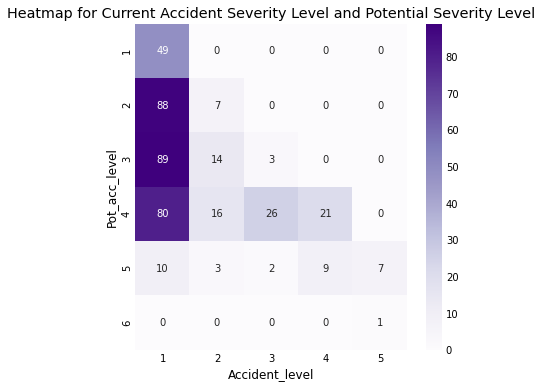

In [8]:
# Pandas profiling report confirms that there is a strong correlation between Accident Level and 
# Potential Accident Level and exploring this further
acc_matrix = pd.crosstab(data_cleaned['Pot_acc_level'], data_cleaned['Accident_level'])
fig, ax = plt.subplots(figsize=(6,6))
ax = sns.heatmap(acc_matrix, annot=True, cmap='Purples', ax=ax, square=True)
plt.title("Heatmap for Current Accident Severity Level and Potential Severity Level")
plt.show()

__Insights from the above heatmap__
1. Here the accident level is from 1 to 5 where 1 is not severe and 5 is the most severe.
2. The potential accident level is from 1 to 6 where it communicates how severe the accident could have been due to various safety factors involved with the accident.

From the above heatmap, it conveys that even though there are a large number of accident level 1 category (not severe) but it could become potentially severe (88 cases), more severe (89 cases) and high severe (80 cases). This confirms that any lack of focus could result into more serious accidents.

In [9]:
# Working on the correlation between the Accident Level and the Potential Accident Level
data_cleaned['Accident_level'].corr(data_cleaned['Pot_acc_level'])

0.5027041444661502

In [10]:
# Working on finding out if number of accidents decreases if the potential accident level increases
acc_level_count = np.round(data_cleaned['Accident_level'].value_counts(normalize=True) * 100)
pot_acc_count = np.round(data_cleaned['Pot_acc_level'].value_counts(normalize=True) * 100)
acc_vs_pot = pd.concat([acc_level_count, pot_acc_count], axis=1, sort=False).fillna(0).rename(columns={'Accident_level': 'Accidents', 'Pot_acc_level': 'Potential'})
acc_vs_pot = acc_vs_pot.reset_index().rename(columns={'index':'level'})
acc_vs_pot.head(6)

,level,Accidents,Potential
0,1,74.0,12.0
1,2,9.0,22.0
2,3,7.0,25.0
3,4,7.0,34.0
4,5,2.0,7.0
5,6,0.0,0.0


In [12]:
accvspot_melted = pd.melt(acc_vs_pot, id_vars=['level'], value_vars=[['Accidents', 'Potential']], value_name='response')
accvspot_melted = pd.DataFrame(accvspot_melted)
accvspot_melted.info()

TypeError: unhashable type: 'list'

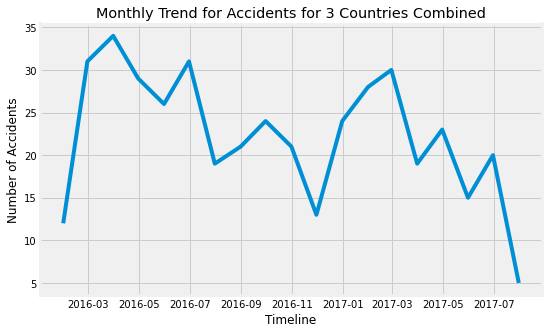

In [13]:
# Frequency plotting over the time for 3 countries combined for level of accidents
monthly_accidentdata = data_cleaned.set_index('Date')['Accident_level'].resample('M').count()
plt.figure(figsize=(8,5))
plt.plot(monthly_accidentdata)
plt.xlabel('Timeline')
plt.ylabel('Number of Accidents')
plt.title("Monthly Trend for Accidents for 3 Countries Combined")
plt.show()

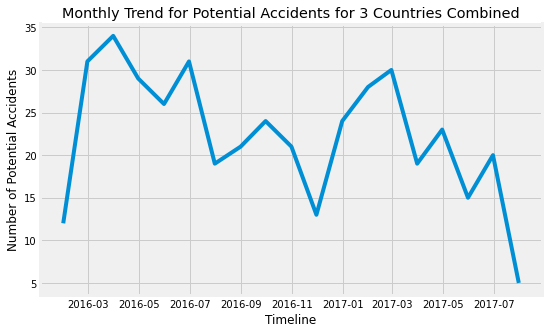

In [14]:
# Let us also find the Monthly Trend for the Potential Accidents for all the countries combined over the time
monthly_potential = data_cleaned.set_index('Date')['Pot_acc_level'].resample('M').count()
plt.figure(figsize=(8,5))
plt.plot(monthly_potential)
plt.xlabel('Timeline')
plt.ylabel('Number of Potential Accidents')
plt.title("Monthly Trend for Potential Accidents for 3 Countries Combined")
plt.show()

It is obvious that both real accidents and potential accidents go hand in hand.

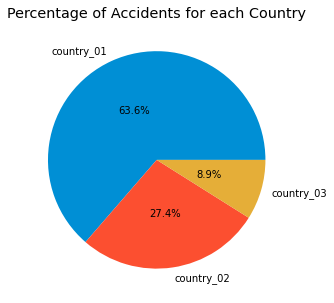

In [15]:
# Pie Chart for different countries for total number of accidents
data_countryac = data_cleaned.groupby('Country')['Accident_level'].sum()
plt.figure(figsize=(8, 5))
plt.pie(x=data_countryac, autopct="%.1f%%", pctdistance=0.5, labels=data_countryac.keys())
plt.title("Percentage of Accidents for each Country")
plt.show()

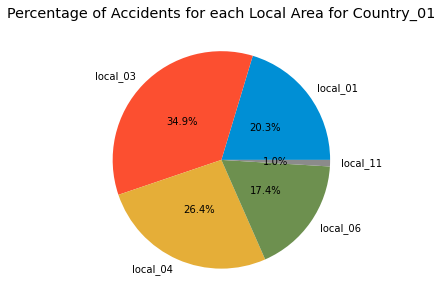

In [16]:
# Since country_01 has the lion's share in terms of number of accidents, we will dive into the localities now.
country1_data = data_cleaned[data_cleaned['Country']=='country_01']
country1_localdata = country1_data.groupby('Local')['Accident_level'].sum()
plt.figure(figsize=(8, 5))
plt.pie(x=country1_localdata, autopct="%.1f%%", pctdistance=0.5, labels=country1_localdata.keys())
plt.title("Percentage of Accidents for each Local Area for Country_01")
plt.show()

There are 4 main communities which needs to be focused i.e. local_03, local_04, local_01 and local_06 in terms of building awareness of safety in their work area.

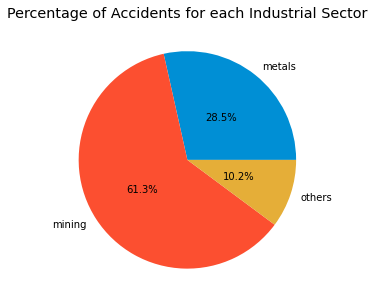

In [17]:
# Pie Chart for different Industry Sectors for all countries combined
data_industryac = data_cleaned.groupby('Industry')['Accident_level'].sum()
plt.figure(figsize=(8, 5))
plt.pie(x=data_industryac, autopct="%.1f%%", pctdistance=0.5, labels=data_industryac.keys())
plt.title("Percentage of Accidents for each Industrial Sector")
plt.show()

Mining is the main industry where there are a large number of accidents.